In [1]:
!pip install rdkit-pypi
!pip install mordred

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mordred import Calculator, descriptors
import seaborn as sns
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
%matplotlib inline
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings

In [3]:
df_drop = pd.read_csv('df_drop.csv')
df_drop

,Unnamed: 0,SMILES,IC50,pIC50,SMILES_new
0,0,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1363.0,5.865504,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4)c...
1,1,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,878.0,6.056505,CC(=O)NCCNCc1cc(Cl)c(OCc2cccc(-c3cccc4c3CCN4C)...
2,2,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,743.0,6.129011,CCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CNC...
3,3,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,1728.0,5.762456,CCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(CN...
4,4,CC(NCCNCC1=CC(Cl)=C(OCC2=CC=CC(C3=CC=CC4=C3CCN...,905.0,6.043351,COCCCN1CCc2c(-c3cccc(COc4cc(OCc5cccc(C#N)c5)c(...
...,...,...,...,...,...
1413,1435,CC1=C(C2=NN=C(NC3=CC(CN4CCOCC4)=CC=C3)O2)C=CC=...,64.1,7.193142,Cc1c(-c2ccccc2)cccc1-c1nnc(Nc2cccc(CN3CCOCC3)c...
1414,1436,O=C(C(C1=NN=C(N2CCN(CC2)C(C(NCC3=CC(Cl)=C(C=C3...,131.0,6.882729,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CNC(C)(C)C(=O)N3...
1415,1437,O=C(C1=NN=C(C2=CNC(NC2=O)=O)C=C1)NCCNCC3=CC=C(...,108.0,6.966576,COc1nc(-c2cccc(-c3ccccc3)c2C)ccc1CNCCNC(=O)c1c...
1416,1438,N#CC1=CC=CC(COC2=CC(OCC3=C(C)C(C4=CC=CC=C4)=CC...,6.0,8.221849,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN3CCCCC3C(=O)N3...


(array([  4.,  31.,  74., 153., 138., 194., 138.,  78., 197., 411.]),
 array([ 4.01502287,  4.63570546,  5.25638805,  5.87707064,  6.49775322,
         7.11843581,  7.7391184 ,  8.35980099,  8.98048357,  9.60116616,
        10.22184875]),
 <BarContainer object of 10 artists>)

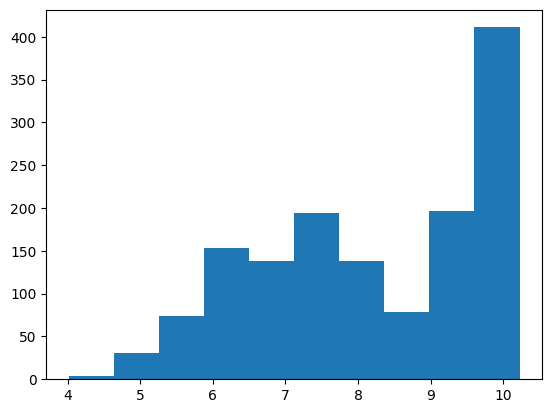

In [4]:
plt.hist(df_drop.pIC50)

In [5]:
mordred = pd.read_csv('mordred_descriptors.csv')
mordred_new = mordred.drop(mordred.columns[0], axis = 1)
mordred_new.to_csv('mordred_new.csv')


In [6]:
X = mordred_new
Y = df_drop.pIC50
data = pd.concat([Y,X], axis=1)
data.to_csv('data.csv')
data

,pIC50,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,5.865504,NaN,NaN,0,1,55.980290,2.462072,4.888468,55.980290,1.301867,...,10.600502,93.926457,594.239769,7.618459,7393,67,222,259,12.694444,9.611111
1,6.056505,NaN,NaN,0,1,57.132715,2.482341,4.912528,57.132715,1.298471,...,10.646781,95.447729,608.255419,7.509326,7866,70,228,267,13.555556,9.805556
2,6.129011,NaN,NaN,0,1,58.458181,2.487929,4.919335,58.458181,1.299071,...,10.664270,96.553856,622.271069,7.407989,8383,72,232,272,13.805556,10.138889
3,5.762456,NaN,NaN,0,1,59.696118,2.489356,4.921111,59.696118,1.297742,...,10.672461,97.619769,636.286719,7.313640,8945,73,236,276,14.055556,10.388889
4,6.043351,NaN,NaN,0,1,62.245625,2.489808,4.921688,62.245625,1.296784,...,10.684302,99.742532,666.297284,7.321948,10208,75,244,284,14.555556,10.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,7.193142,NaN,NaN,0,1,42.907237,2.434918,4.833070,42.907237,1.340851,...,10.313376,81.550972,426.205576,7.348372,3368,48,170,199,7.500000,7.027778
1414,6.882729,NaN,NaN,0,1,77.199605,2.420240,4.840481,77.199605,1.308468,...,11.013715,98.205108,810.304494,7.944162,18480,100,314,370,18.062500,12.875000
1415,6.966576,NaN,NaN,0,1,55.031364,2.433555,4.867109,55.031364,1.310271,...,10.616021,79.314414,563.228102,7.932790,7994,69,218,256,12.444444,9.388889
1416,8.221849,NaN,NaN,0,1,80.967622,2.431144,4.862287,80.967622,1.327338,...,11.043514,100.375216,836.320144,7.889813,19600,104,326,386,16.972222,13.388889


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=25112001)


In [11]:
X_test


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1215,NaN,NaN,0,1,50.042695,2.387991,4.775981,50.042695,1.316913,4.547694,...,10.380436,74.443861,570.151805,8.263070,5253,58,190,219,11.111111,8.777778
1074,NaN,NaN,1,1,56.351799,2.432693,4.839607,56.351799,1.310507,4.701471,...,10.686635,96.426135,663.077175,9.472531,7004,69,232,275,12.416667,9.305556
1190,NaN,NaN,1,1,50.836946,2.386857,4.773714,50.836946,1.303511,4.573751,...,10.414663,75.609284,585.126319,8.733229,5674,60,196,226,11.972222,8.888889
579,NaN,NaN,0,2,65.480196,2.475194,4.950346,65.480196,1.309604,4.839806,...,10.835081,101.841374,718.254957,7.980611,11744,84,264,313,15.388889,11.111111
901,NaN,NaN,0,2,65.724632,2.474875,4.949728,65.724632,1.314493,4.838710,...,10.785622,103.744865,718.254957,7.980611,12143,80,262,309,14.777778,11.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,NaN,NaN,1,1,58.424681,2.410931,4.819464,58.424681,1.298326,4.726090,...,10.636552,96.115412,653.133170,8.826124,8343,71,232,271,13.805556,10.111111
126,NaN,NaN,0,0,37.228273,2.445087,4.890173,37.228273,1.283734,4.278943,...,10.211450,64.298079,407.140055,7.983138,2468,46,146,170,9.750000,6.583333
961,NaN,NaN,0,2,66.870422,2.535663,5.012167,66.870422,1.311185,4.892479,...,11.092504,107.285020,725.239641,8.241360,12294,86,288,350,14.562500,10.888889
46,NaN,NaN,1,1,58.452802,2.428889,4.857778,58.452802,1.298951,4.729380,...,10.740713,82.802336,608.252252,7.509287,8182,76,236,278,14.506944,10.000000


In [114]:
Y_test

1215     6.638272
1074     7.614394
1190     6.195861
579     10.102373
901     10.142667
          ...    
1332     6.993962
126      8.209012
961      9.946922
46       8.647817
1004    10.096910
Name: pIC50, Length: 284, dtype: float64

In [31]:
Y_train

1263     5.109188
1416     8.221849
389      8.826814
734      9.939302
75       7.058489
          ...    
485      9.232102
607      9.345823
594      9.443697
994     10.102373
887      9.774691
Name: pIC50, Length: 1134, dtype: float64

In [13]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors= 10)     
X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)
X_train_imp_df = pd.DataFrame(X_train_imp)
X_test_imp_df = pd.DataFrame(X_test_imp)
X_test_imp_df

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,0.0,1.0,50.042695,2.387991,4.775981,50.042695,1.316913,4.547694,4.944275,0.130113,...,10.380436,74.443861,570.151805,8.263070,5253.0,58.0,190.0,219.0,11.111111,8.777778
1,1.0,1.0,56.351799,2.432693,4.839607,56.351799,1.310507,4.701471,5.572518,0.129593,...,10.686635,96.426135,663.077175,9.472531,7004.0,69.0,232.0,275.0,12.416667,9.305556
2,1.0,1.0,50.836946,2.386857,4.773714,50.836946,1.303511,4.573751,4.873259,0.124955,...,10.414663,75.609284,585.126319,8.733229,5674.0,60.0,196.0,226.0,11.972222,8.888889
3,0.0,2.0,65.480196,2.475194,4.950346,65.480196,1.309604,4.839806,5.239078,0.104782,...,10.835081,101.841374,718.254957,7.980611,11744.0,84.0,264.0,313.0,15.388889,11.111111
4,0.0,2.0,65.724632,2.474875,4.949728,65.724632,1.314493,4.838710,5.150974,0.103019,...,10.785622,103.744865,718.254957,7.980611,12143.0,80.0,262.0,309.0,14.777778,11.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.0,1.0,58.424681,2.410931,4.819464,58.424681,1.298326,4.726090,5.760303,0.128007,...,10.636552,96.115412,653.133170,8.826124,8343.0,71.0,232.0,271.0,13.805556,10.111111
280,0.0,0.0,37.228273,2.445087,4.890173,37.228273,1.283734,4.278943,4.432368,0.152840,...,10.211450,64.298079,407.140055,7.983138,2468.0,46.0,146.0,170.0,9.750000,6.583333
281,0.0,2.0,66.870422,2.535663,5.012167,66.870422,1.311185,4.892479,5.178339,0.101536,...,11.092504,107.285020,725.239641,8.241360,12294.0,86.0,288.0,350.0,14.562500,10.888889
282,1.0,1.0,58.452802,2.428889,4.857778,58.452802,1.298951,4.729380,5.373970,0.119422,...,10.740713,82.802336,608.252252,7.509287,8182.0,76.0,236.0,278.0,14.506944,10.000000


In [14]:
X_train_imp_df

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,0.0,2.0,45.389750,2.462211,4.845531,45.389750,1.334993,4.464774,4.119729,0.121169,...,10.403869,84.582095,458.256943,6.739073,4148.0,53.0,180.0,212.0,8.611111,7.500000
1,0.0,1.0,80.967622,2.431144,4.862287,80.967622,1.327338,5.044198,6.456053,0.105837,...,11.043514,100.375216,836.320144,7.889813,19600.0,104.0,326.0,386.0,16.972222,13.388889
2,0.0,2.0,59.533503,2.587641,5.175281,59.533503,1.294207,4.791240,3.049309,0.066289,...,11.147714,98.476463,659.217843,8.138492,9115.0,75.0,256.0,310.0,12.979167,10.000000
3,0.0,2.0,62.486392,2.475801,4.951561,62.486392,1.275232,4.828552,5.409166,0.110391,...,10.934873,101.078523,705.259708,7.836219,11191.0,81.0,264.0,314.0,15.840278,10.666667
4,0.0,1.0,41.950966,2.392544,4.784957,41.950966,1.310968,4.389323,4.730537,0.147829,...,10.244627,80.826993,428.173607,7.645957,3414.0,47.0,164.0,190.0,9.000000,7.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.0,2.0,62.154288,2.514231,4.996665,62.154288,1.294881,4.844335,6.014680,0.125306,...,11.173262,103.206068,722.124583,9.258007,10574.0,80.0,278.0,339.0,13.902778,10.000000
1130,0.0,2.0,62.496673,2.475410,4.950779,62.496673,1.302014,4.804836,5.270271,0.109797,...,10.851219,99.802929,691.244058,7.945334,10570.0,78.0,254.0,302.0,14.277778,10.750000
1131,0.0,2.0,63.081132,2.475246,4.950124,63.081132,1.314190,4.813508,5.280617,0.110013,...,10.814303,106.217128,686.228742,8.169390,10611.0,78.0,254.0,303.0,14.277778,10.777778
1132,0.0,2.0,66.097846,2.478108,4.953542,66.097846,1.321957,4.862937,5.398367,0.107967,...,10.843163,108.356763,715.244058,8.036450,11559.0,80.0,270.0,321.0,13.888889,10.916667


In [15]:
column_to_drop = []

In [16]:
# A. Remove highly correlated features (abs(R) >= 0.8)

corr_matrix = X_train_imp_df.corr().abs()


up_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
col_corr = [column for column in up_triangle.columns if any(up_triangle[column]>= 0.8)]
for i in range(len(col_corr)):
    column_to_drop.append(col_corr[i])

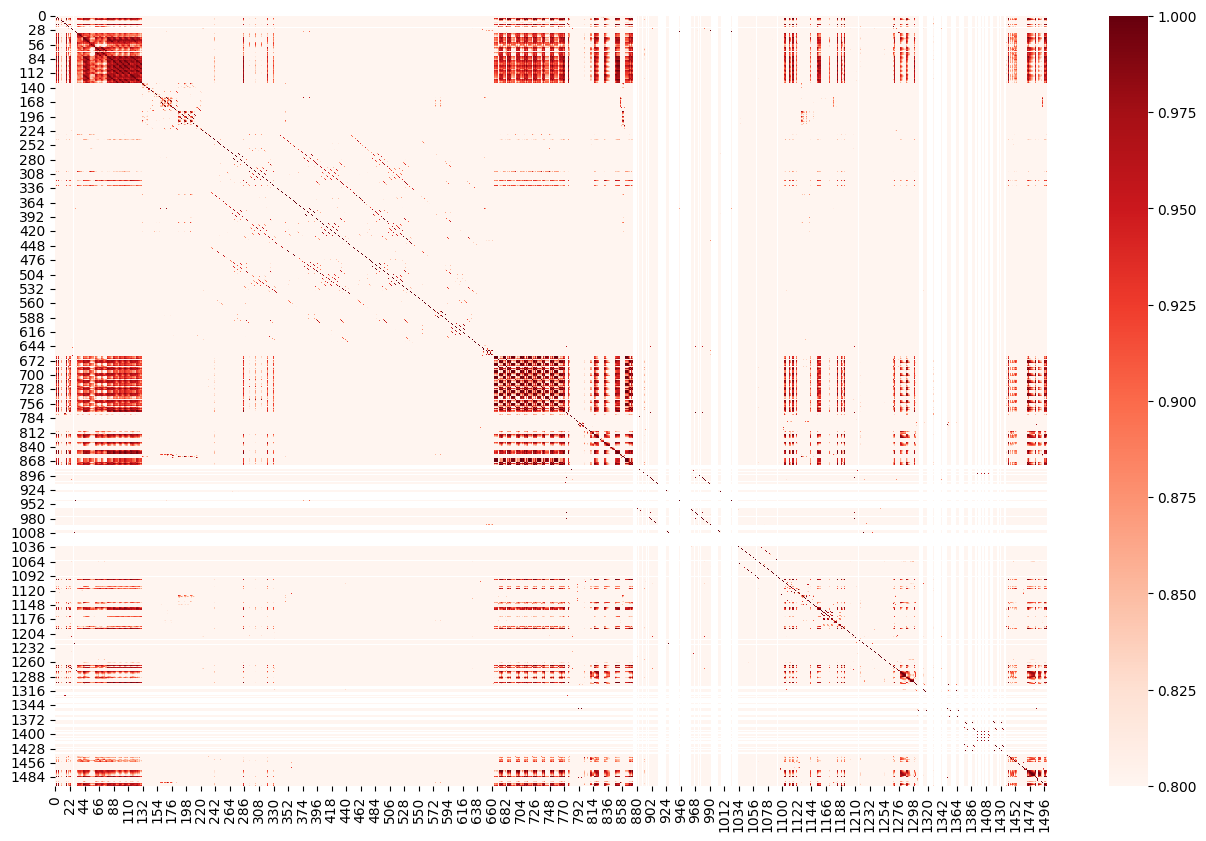

In [17]:
plt.figure(figsize = (16,10))
sns.heatmap(corr_matrix, cmap = 'Reds', vmin=0.8, vmax=1.0)
plt.show()

In [18]:
variances = X_train_imp_df.var()
col_var = variances[variances <= 0.1].index
for j in range(len(col_var)):
    column_to_drop.append(col_var[j])

In [19]:
column_to_drop = list(set(column_to_drop))
len(column_to_drop)

1363

In [20]:
X_train_drop = X_train_imp_df.drop(columns= column_to_drop)
X_test_drop = X_test_imp_df.drop(columns=column_to_drop)
X_train_drop

,0,1,2,8,11,14,18,25,26,28,...,1264,1304,1305,1317,1328,1353,1373,1379,1380,1441
0,0.0,2.0,45.389750,4.119729,864.049996,18.0,0.0,3.0,0.0,0.0,...,0.333333,1.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0,4.12092
1,0.0,1.0,80.967622,6.456053,1008.649352,36.0,0.0,5.0,0.0,0.0,...,1.751018,0.0,8.0,4.0,0.0,2.0,0.0,0.0,0.0,6.88200
2,0.0,2.0,59.533503,3.049309,122377.395700,24.0,0.0,3.0,0.0,0.0,...,0.878531,1.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,5.60190
3,0.0,2.0,62.486392,5.409166,1466.326810,24.0,0.0,4.0,0.0,0.0,...,0.627498,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,5.59890
4,0.0,1.0,41.950966,4.730537,555.342793,23.0,0.0,4.0,0.0,0.0,...,0.200000,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,6.03202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.0,2.0,62.154288,6.014680,516.611604,24.0,2.0,2.0,0.0,0.0,...,1.591937,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,5.52500
1130,0.0,2.0,62.496673,5.270271,1788.804903,24.0,0.0,4.0,0.0,0.0,...,0.736685,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,5.61690
1131,0.0,2.0,63.081132,5.280617,1684.906864,24.0,0.0,3.0,0.0,0.0,...,0.813279,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,5.59918
1132,0.0,2.0,66.097846,5.398367,2083.171366,24.0,0.0,4.0,0.0,0.0,...,0.943409,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,5.46560


In [21]:
X_test_drop

,0,1,2,8,11,14,18,25,26,28,...,1264,1304,1305,1317,1328,1353,1373,1379,1380,1441
0,0.0,1.0,50.042695,4.944275,627.950986,24.0,0.0,3.0,0.0,0.0,...,0.720213,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.95998
1,1.0,1.0,56.351799,5.572518,508.056179,27.0,0.0,6.0,0.0,0.0,...,0.210819,2.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,6.48350
2,1.0,1.0,50.836946,4.873259,720.582158,24.0,0.0,4.0,0.0,0.0,...,0.780801,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.71398
3,0.0,2.0,65.480196,5.239078,2106.598703,24.0,0.0,4.0,0.0,0.0,...,0.655927,1.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,5.06030
4,0.0,2.0,65.724632,5.150974,3931.224530,24.0,0.0,4.0,0.0,0.0,...,0.630008,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,4.82320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.0,1.0,58.424681,5.760303,608.797898,27.0,0.0,8.0,0.0,0.0,...,0.672073,1.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,5.26080
280,0.0,0.0,37.228273,4.432368,688.692298,18.0,0.0,2.0,0.0,0.0,...,0.423231,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.47462
281,0.0,2.0,66.870422,5.178339,9812.219066,27.0,1.0,3.0,0.0,0.0,...,1.640539,3.0,4.0,2.0,1.0,0.0,1.0,1.0,0.0,4.76480
282,1.0,1.0,58.452802,5.373970,892.831468,24.0,0.0,7.0,0.0,0.0,...,0.172503,0.0,5.0,1.0,0.0,1.0,1.0,0.0,1.0,5.69652


In [22]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train_drop)
X_test_norm = norm.transform(X_test_drop)
X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.0,0.50,0.166367,0.322980,0.000008,0.052632,0.0,0.250000,0.0,0.0,...,0.083460,0.25,0.285714,0.2,0.0,0.333333,0.5,0.5,0.0,0.378515
1,0.0,0.25,0.597293,0.898495,0.000010,1.000000,0.0,0.416667,0.0,0.0,...,0.501059,0.00,0.857143,0.8,0.0,0.666667,0.0,0.0,0.0,0.688552
2,0.0,0.50,0.337679,0.059300,0.001500,0.368421,0.0,0.250000,0.0,0.0,...,0.244056,0.25,0.285714,0.4,0.0,0.000000,0.5,0.0,0.0,0.544812
3,0.0,0.50,0.373445,0.640611,0.000015,0.368421,0.0,0.333333,0.0,0.0,...,0.170110,0.25,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.544475
4,0.0,0.25,0.124716,0.473442,0.000004,0.315789,0.0,0.333333,0.0,0.0,...,0.044185,0.25,0.142857,0.0,0.5,0.000000,0.0,0.0,0.0,0.593110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.0,0.50,0.369422,0.789770,0.000004,0.368421,1.0,0.166667,0.0,0.0,...,0.454200,0.50,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.536177
1130,0.0,0.50,0.373569,0.606397,0.000019,0.368421,0.0,0.333333,0.0,0.0,...,0.202273,0.25,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.546496
1131,0.0,0.50,0.380648,0.608945,0.000018,0.368421,0.0,0.250000,0.0,0.0,...,0.224835,0.25,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.544507
1132,0.0,0.50,0.417187,0.637951,0.000023,0.368421,0.0,0.333333,0.0,0.0,...,0.263167,0.50,0.285714,0.4,0.0,0.000000,0.0,0.0,0.0,0.529507


TRAIN


In [29]:
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.to_csv('X_test_norm.csv')

In [30]:
X_train_norm.to_csv('X_train_norm.csv')
Y_train.to_csv('Y_train.csv')
Y_test.to_csv('Y_test.csv')

In [24]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

model = SVR(C=10)

model.fit(X_train_norm, Y_train)
Y_pred_train = model.predict(X_train_norm)
Y_pred_test = model.predict(X_test_norm)

cross = cross_val_score(model, X_train_norm, Y_train, cv = 10)

print (f'r2 train: {r2_score(Y_train, Y_pred_train)}')
print (f'r2test:{r2_score(Y_test, Y_pred_test)}')
print (cross)
print (cross.mean())

r2 train: 0.9730159787695991
r2test:0.9003054913455889
[0.86339622 0.90105922 0.84795635 0.89225638 0.88229571 0.86396592
 0.91388733 0.90128413 0.872158   0.92137211]
0.8859631383129442


In [136]:
model.coef_.argsort()[::-1]

array([  5, 133,  79,  11,  83,  80,  46,  73,  12,  74,  82, 123,  34,
       112,  24,  81,  67,  26,  29,  31,  39,  54,  18,  96,  59,  58,
       110,  63,  33, 107,  70,  56,  40,  47,  89,  84, 119,  50,  69,
        48,  60,  92,  35,  37,   3, 128,  93,  52,  61,  43, 131,   6,
        27,  86, 104, 124, 136,   8, 103,  65,  22,  87,  21,  66,  41,
         4,  95, 135,  75,  76,  15,  53,  72,  94,  14, 105,  77,  32,
        30,  88,  91, 125,  17,  90,   1,  38, 101, 113,  45, 134,  36,
        19, 106, 102,  57,  23,  64, 114,   2,  44, 127, 115,  49,  85,
        62,  20,  98,  68, 126, 120,   0, 137,  51, 129, 116,  16,  10,
       122,  78,  42, 121,  13, 100, 109,  97, 108, 117,  99,  25,  55,
       111,  71,   9,  28, 118,   7, 132, 130], dtype=int64)

In [148]:
model.feature_importances_.argsort()[::-1]

array([  1,  88,  10,  99,   3,  71,  65, 103,  68,  93,  15, 124,  98,
        42, 118,  89,  36,  57, 110, 127,  34, 123, 115,  44,  24,  26,
        16,  12, 137,  35,  43,  21,   7,  11,  49,  60, 117,  47,  19,
        48,  67,  20,  59,  38, 102,  32,  18, 126,  61,  91, 121,  52,
        39, 104,  23, 119, 116, 125,  63, 120, 122,  64, 128,  27,  28,
        17,  58,  53,   4,  50,  14,  85,  87,  51,  29,  66, 131,  37,
        72,  54,  30,  22,  95,  41,  13,  97,  94,  86,  33,  55,  31,
       109, 111,  62,  90,  25, 112,  92,  40,  46, 113,  56,   2,  80,
        84,  45,  69,   5,  74, 134,  82, 114, 105, 108, 100, 107,  73,
       106,  70,  78, 135,  77,  79,  83,  96,   0, 133, 101, 132, 136,
        75, 129,   8, 130,  81,   9,   6,  76], dtype=int64)

In [81]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1, 1, 5, 10],
            'epsilon':[1e-2, 0.1,0.5],
            'kernel':['rbf', 'sigmoid']
}
model = SVR()

grid = GridSearchCV(model, params, scoring='r2',cv = 10, verbose = 2)
grid.fit(X_train_norm, Y_train)

best_parameter = grid.best_params_
best_score = grid.best_score_

print(best_parameter)
print(best_score)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.2s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ................C=0.1, epsilon=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ................C=0.1, epsilon=0.01, 

In [151]:
leverage_train = np.diag(X_train_norm@ np.linalg.inv(X_train_norm.T @ X_train_norm) @ X_train_norm.T)
leverage_test = np.diag(X_test_norm@ np.linalg.inv(X_train_norm.T @ X_train_norm) @ X_test_norm.T)


1215                                             6.638272
1074                                             7.614394
1190                                             6.195861
579                                             10.102373
901                                             10.142667
                              ...                        
126                                              8.209012
961                                              9.946922
46                                               8.647817
1004                                             10.09691
pred    [6.5063397158100065, 7.670834492598167, 6.9387...
Name: pIC50, Length: 285, dtype: object

In [152]:
Y_test['pred'] = Y_pred_test
Y_test['residual'] = Y_test['pIC50'] - Y_test['pred']
Y_test['squared'] = Y_test['residual']**2
mse_test = Y_test['squared'].sum()/(len(Y_test['squared']))
Y_test['leverage'] = leverage_test
Y_test['standard'] = Y_test['residual']/(mse_test)**0.5


KeyError: 'pIC50'